In [2]:
import xarray as xr
import math 
import numpy as np 
import matplotlib.pyplot as plt 
import s3fs

In [11]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}/*'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, combine='by_coords',compat='override')
    # rename variabel
    dset = dset.rename({'__xarray_dataarray_variable__' : 'vel'})
    return dset

In [14]:
dset = open_s3fs('PC-data')
dset

<xarray.Dataset>
Dimensions:        (depth: 75, x: 1580, y: 1801)
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered  object ...
    time_counter   object ...
    nav_lat        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    vel            (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>
    mbathy         (y, x) int16 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    vomecrty       (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>
    vozocrtx       (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>

In [15]:
# rewriting the name of the variables 
vvar = dset.vomecrty
uvar = dset.vozocrtx
uv = dset.vel

In [16]:
# choosing a point 
x = 1020 
y = 1540 

In [17]:
uvar.shape

(75, 1801, 1580)

In [19]:
u = uvar[:,y,x]
v = vvar[:,y,x]
uv = uv[:,y,x]

In [27]:
uv.shape

(75,)

In [35]:
A = xr.DataArray([[u,uv],[uv,v]], dims=["u", "v", "depth"])
A

<xarray.DataArray (u: 2, v: 2, depth: 75)>
array([[[ 7.6290686e-04,  7.4096303e-04,  7.1832229e-04,  6.9421867e-04,
          6.6086772e-04,  6.0906366e-04,  5.3916883e-04,  5.0896511e-04,
          4.8384810e-04,  4.6743653e-04,  3.9377520e-04,  3.0819737e-04,
          1.5554276e-04,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.8138307e-05, -2.9813506e-05, -2.8374703e-05, -2.6684203e-05,
...
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 4.1813159e-04,  3.9604475e-04,  3.7641838e-04,  3.5317719e-04,
          3.2739513e-04,  2.9279786e-04,  2.3922973e-04,  1.8037228e-04,
          1.3437182e-04,  1.0382041e-04,  8.5853935e-05,  7.8796649e-05,
          9.9078439e-05,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]], dtype=float32)
Dimensions without coordinates: u, v, depth

In [41]:
cov = A.mean(dim='depth')
cov

<xarray.DataArray (u: 2, v: 2)>
array([[ 9.3910348e-05, -2.3126569e-07],
       [-2.3126569e-07,  4.1139840e-05]], dtype=float32)
Dimensions without coordinates: u, v

In [42]:
#eigenvectors and eigenvalues
values, vectors = np.linalg.eig(cov)
print('vectors:  ', vectors)
print('values:  ',values)



vectors:   [[ 0.9999904   0.00438235]
 [-0.00438235  0.9999904 ]]
values:   [9.3911360e-05 4.1138825e-05]


In [43]:
#Reagarnge the eigen values in descending order 
#Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])



Eigenvalues in descending order:
9.391136e-05
4.1138825e-05


In [44]:
#Feature vectors chosen from the eigenvectors I want to keep with the highest corresponding eigenvalue
F = np.array([vectors[0],vectors[1]])
print(F[:,0])
F



[ 0.9999904  -0.00438235]


array([[ 0.9999904 ,  0.00438235],
       [-0.00438235,  0.9999904 ]], dtype=float32)

In [47]:
# project PC onto center values of original data 
P = vectors.T.dot(A)
#print(P.T)

'\n#plt.scatter(P[:,0],P[:,1],s=6) #the projected data \nplt.scatter(A[:,0],A[:,1],s=6) #the centered data plotted \nplt.plot(F[:,0]) #PC1 \nplt.plot(F[:,1]) #PC2\n#plt.plot(P.T[:,0])\n#plt.plot(P.T[:,1])\n#plt.plot(vectors[0]*values[0]) \n#plt.plot(vectors[1]*values[1])'

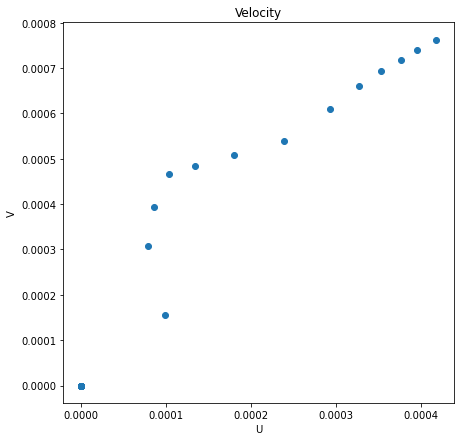

In [58]:
#plot the data 
fig = plt.figure(figsize=(7, 7))
plt.title('Velocity')
plt.xlabel('U')
plt.ylabel('V')

plt.scatter(v,u)

'''
#plt.scatter(P[:,0],P[:,1],s=6) #the projected data 
plt.scatter(A[:,0],A[:,1],s=6) #the centered data plotted 
plt.plot(F[:,0]) #PC1 
plt.plot(F[:,1]) #PC2
#plt.plot(P.T[:,0])
#plt.plot(P.T[:,1])
#plt.plot(vectors[0]*values[0]) 
#plt.plot(vectors[1]*values[1])'''

In [20]:
# funcktion for rolling mean 
def running_mean(x, N):
    out = np.zeros_like(x, dtype=np.float64)
    dim_len = x.shape[0]
    for i in range(dim_len):
        if N%2 == 0:
            a, b = i - (N-1)//2, i + (N-1)//2 + 2
        else:
            a, b = i - (N-1)//2, i + (N-1)//2 + 1

        #cap indices to min and max indices
        a = max(0, a)
        b = min(dim_len, b)
        out[i] = np.mean(x[a:b])
    return out

In [ ]:
'A funcktion for constructing PC at a given level '
def PC_funk(level):
    warnings.filterwarnings('ignore')
    
    dx = 20
    dy = 20
    # Making empty list with size as data-points 
    jmax, imax = uv[0].shape #fetches the max value in j and i direction 
    i_list = np.arange(0,imax,dx)
    j_list = np.arange(0,jmax,dy)
    
    # Making the covmatrix and finding the eigenvalues and eigenvectors
    # list of all the points for the PC-crosses
    'Dont remember how I got to this number, so dont know how to change the number of points in each PC'
    PC11 = np.zeros(3379)
    PC12 = np.zeros(3379)
    PC21 = np.zeros(3379)
    PC22 = np.zeros(3379)
    y = np.zeros(3379)
    x = np.zeros(3379)
    indx = 0
    
    # to get the loop to run faster
    uvy = np.array(uv.y.values)
    uvx = np.array(uv.x.values)
    
    # fetching the varaibel at the given level 
    uvar_depth = np.array(uvar[level,:,:].values)
    vvar_depth = np.array(vvar[level,:,:].values)
    uv_depth = np.array(uv[level,:,:].values)
    
    for i in i_list:
        for j in j_list:
            covm = np.array([[uvar_depth[j,i],uv_depth[j,i]],
            [uv_depth[j,i],vvar_depth[j,i]]],dtype=float)
            if np.isnan(covm).any():
                continue
            else:
                values, vectors = np.linalg.eig(covm)
                PC11[int(indx)] = vectors[0,0]*np.sqrt(values[0])
                PC12[int(indx)] = vectors[1,0]*np.sqrt(values[0])
                PC21[int(indx)] = vectors[0,1]*np.sqrt(values[1])
                PC22[int(indx)] = vectors[1,1]*np.sqrt(values[1])
                y[int(indx)] = uvy[j]
                x[int(indx)] = uvx[i]
                indx = indx + 1
                
    # converting to np.arrays
    PC11 = np.array(PC11,dtype=float)
    PC12 = np.array(PC12,dtype=float)
    PC21 = np.array(PC21,dtype=float)
    PC22 = np.array(PC22,dtype=float)
    y = np.array(y,dtype=float)
    x = np.array(x,dtype=float)
    
    # smoothening the data
    PC11 = running_mean(PC11, 10)
    PC12 = running_mean(PC12, 10)
    PC21 = running_mean(PC21, 10)
    PC22 = running_mean(PC22, 10)
    
    return PC11, PC12, PC21, PC22, x, y 